# Prepare configuration for the pipeline and Google authorization, import libraries

In [1]:
# Import libraries
import os
import sys
from google.colab import auth
import yaml
# Mount your Google Drive to access persistent files
from google.colab import drive
drive.mount('/content/drive')

# Authenticate user
auth.authenticate_user()

# Create project direction
project_dir = "/content/drive/MyDrive/elt_pipeline_weather_forecast/weather_pipeline"
os.makedirs(project_dir, exist_ok=True)
# Make sure the path is in sys.path
sys.path.append(project_dir)

# Build .yaml-file
# Define the configuration data (this can be modified as per your need)
# Documentation for Open-Meteo requests
# https://pypi.org/project/openmeteo-requests/

config_data = {
    "project": {
        "project_id": "elt-siegburg-weather-forecast",
        "dataset_historical": "elt_weather_dataset_historical_siegburg_2017_2024",
        "table_historical": "elt_weather_table_historical_siegburg_2017",
        "dataset_month": "elt_weather_dataset_siegburg_october_2025",
        "table_8h": "elt_weather_8h_table_{timestamp}",
        "dataset_prediction": "elt_weather_dataset_prediction_siegburg_october_2025",
    },
    # Weather data provided by Open-Meteo (CC BY 4.0)
    "api_current": {
        "elt_weather_table_current": "https://api.open-meteo.com/v1/forecast?latitude=50.79086&longitude=7.2064056&current=temperature_2m,relative_humidity_2m,surface_pressure,wind_speed_10m,wind_direction_10m,precipitation&timezone=Europe%2FBerlin",
    },
    # Weather data provided by Open-Meteo (CC BY 4.0)
      "api_historical":{
         "elt_weather_table_historical_siegburg_2017": "https://archive-api.open-meteo.com/v1/archive?latitude=50.79086&longitude=7.2064056&start_date=2017-01-01&end_date=2017-12-31&hourly=temperature_2m,relative_humidity_2m,surface_pressure,wind_speed_10m,wind_direction_10m,precipitation&timezone=Europe%2FBerlin",
         "elt_weather_table_historical_siegburg_2018": "https://archive-api.open-meteo.com/v1/archive?latitude=50.79086&longitude=7.2064056&start_date=2018-01-01&end_date=2018-12-31&hourly=temperature_2m,relative_humidity_2m,surface_pressure,wind_speed_10m,wind_direction_10m,precipitation&timezone=Europe%2FBerlin",
         "elt_weather_table_historical_siegburg_2019": "https://archive-api.open-meteo.com/v1/archive?latitude=50.79086&longitude=7.2064056&start_date=2019-01-01&end_date=2019-12-31&hourly=temperature_2m,relative_humidity_2m,surface_pressure,wind_speed_10m,wind_direction_10m,precipitation&timezone=Europe%2FBerlin",
         "elt_weather_table_historical_siegburg_2020": "https://archive-api.open-meteo.com/v1/archive?latitude=50.79086&longitude=7.2064056&start_date=2020-01-01&end_date=2020-12-31&hourly=temperature_2m,relative_humidity_2m,surface_pressure,wind_speed_10m,wind_direction_10m,precipitation&timezone=Europe%2FBerlin",
         "elt_weather_table_historical_siegburg_2021": "https://archive-api.open-meteo.com/v1/archive?latitude=50.79086&longitude=7.2064056&start_date=2021-01-01&end_date=2021-12-31&hourly=temperature_2m,relative_humidity_2m,surface_pressure,wind_speed_10m,wind_direction_10m,precipitation&timezone=Europe%2FBerlin",
         "elt_weather_table_historical_siegburg_2022": "https://archive-api.open-meteo.com/v1/archive?latitude=50.79086&longitude=7.2064056&start_date=2022-01-01&end_date=2022-12-31&hourly=temperature_2m,relative_humidity_2m,surface_pressure,wind_speed_10m,wind_direction_10m,precipitation&timezone=Europe%2FBerlin",
         "elt_weather_table_historical_siegburg_2023": "https://archive-api.open-meteo.com/v1/archive?latitude=50.79086&longitude=7.2064056&start_date=2023-01-01&end_date=2023-12-31&hourly=temperature_2m,relative_humidity_2m,surface_pressure,wind_speed_10m,wind_direction_10m,precipitation&timezone=Europe%2FBerlin",
         "elt_weather_table_historical_siegburg_2024": "https://archive-api.open-meteo.com/v1/archive?latitude=50.79086&longitude=7.2064056&start_date=2024-01-01&end_date=2024-12-31&hourly=temperature_2m,relative_humidity_2m,surface_pressure,wind_speed_10m,wind_direction_10m,precipitation&timezone=Europe%2FBerlin",
    },
    # Placeholders for open-meteo python packages
    "params_current": {
        "latitude": 50.79086,
        "longitude": 7.2064056,
        "start_date": "2017-01-01",
        "end_date": "2017-12-31",
        "current": ["temperature_2m", "relative_humidity_2m", "windspeed_10m", "winddirection_10m",
                    "precipitation", "surface_pressure"],
        "timezone": "Europe/Berlin"
    },
    # Placeholders for open-meteo python packages
    "params_historical": {
        "latitude": 50.79086,
        "longitude": 7.2064056,
        "start_date": "2017-01-01",
        "end_date": "2017-12-31",
        "hourly": ["temperature_2m", "relative_humidity_2m", "precipitation", "wind_speed_10m", "wind_direction_10m"],
        "timezone": "Europe/Berlin",
    }
}

# Write this configuration to a YAML file in Colab
config_file_path = '/content/drive/MyDrive/elt_pipeline_weather_forecast/config.yaml'
with open(config_file_path, 'w') as file:
    yaml.dump(config_data, file, default_flow_style=False)

# Confirm the file has been created
print(f"config.yaml has been written to {config_file_path}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
config.yaml has been written to /content/drive/MyDrive/elt_pipeline_weather_forecast/config.yaml


# GCP Ressource Management (gcp_utils/ or gcloud_admin/)

In [2]:
# Import libraries
import os
import sys
from google.colab import auth
import datetime

# Create gcp utilization direction
gcp_utils_dir = "/content/drive/MyDrive/elt_pipeline_weather_forecast/gcp_utils"
os.makedirs(gcp_utils_dir, exist_ok=True)
# Make sure the path is in sys.path
sys.path.append(gcp_utils_dir)

# Assuming you have the table name template from your config
table_name_template = "elt_weather_8h_table_{timestamp}"
table_name_template_prediction = "elt_weather_prediction_table_{timestamp}"

# Get the current timestamp
current_time = datetime.datetime.now()

# Format the timestamp as yyyy-mm-ddThh:mm
# Note: BigQuery table names cannot contain hyphens or colons directly.
# You need to format it to be BigQuery-compatible, typically using underscores or removing special characters.
# A common format for BigQuery table names derived from timestamps is YYYYMMDD_HHMMSS or YYYY_MM_DD_HH_MM_SS.
# If you specifically need yyyy-mm-ddThh:mm for a different purpose (like a column value),
# you can use the format code below.
# For a BigQuery table name, use a compatible format like YYYYMMDD_HHMM.

timestamp_bq_compatible = current_time.strftime("%Y%m%d_%H%M")
print(f"BigQuery compatible timestamp format: {timestamp_bq_compatible}")

# If you still want the yyyy-mm-ddThh:mm format for other uses:
timestamp_readable = current_time.strftime("%Y-%m-%dT%H:%M")
print(f"Readable timestamp format: {timestamp_readable}")

# Construct the BigQuery table name using the compatible format
table_id_8h_current = table_name_template.format(timestamp=timestamp_bq_compatible)
print(f"Constructed BigQuery Table ID: {table_id_8h_current}")
table_id_8h_prediction_current = table_name_template_prediction.format(timestamp=timestamp_bq_compatible)
print(f"Constructed BigQuery Table ID: {table_id_8h_prediction_current}")

# This 'table_id' is what you would use when calling the BigQuery load function.
# For example:
# table_ref = f"{project_id}.{dataset_id}.{table_id}"
# job = client.load_table_from_dataframe(df, table_ref)

# Generate .py files
# Load the YAML configuration file
load_config = """
import yaml

def load_config(config_file):
    with open(config_file, 'r') as file:
        return yaml.safe_load(file)
"""
# Save to file
with open(f"{project_dir}/load_config.py", "w") as f:
    f.write(load_config)

# create_dataset.py - generate and save inside /contentdrive/MyDrive/elt_pipeline_weather_forecast/gcp_utils
extract_code = """
from google.cloud import bigquery

def create_dataset(PROJECT_ID, dataset_id, location="EU"):
    # Creates a BigQuery dataset if it doesn't exist.
    client = bigquery.Client(project=PROJECT_ID)
    dataset_ref = client.dataset(dataset_id)
    try:
        client.get_dataset(dataset_ref)
        print(f"Dataset '{dataset_id}' already exists.")
    except:
        dataset = bigquery.Dataset(dataset_ref)
        dataset.location = location
        client.create_dataset(dataset)
        print(f"Dataset '{dataset_id}' created.")
"""

# Save to file
with open(f"{gcp_utils_dir}/create_dataset.py", "w") as f:
    f.write(extract_code)


# create_table.py - generate and save inside /content/drive/MyDrive/elt_pipeline_weather_forecast/gcp_utils
extract_code = """
from google.cloud import bigquery

def create_table(PROJECT_ID, dataset_id, table_id):

    # Creates a BigQuery table if it doesn't exist.
    client = bigquery.Client(project=PROJECT_ID)
    dataset_ref = client.dataset(dataset_id)
    table_ref = dataset_ref.table(table_id)
    try:
        client.get_table(table_ref)
        print(f"Table '{table_id}' already exists.")
    except:
        # table = bigquery.Table(table_ref, schema=schema)
        table = bigquery.Table(table_ref)
        client.create_table(table)
        print(f"Table '{table_id}' created.")
"""

# Save to file
with open(f"{gcp_utils_dir}/create_table.py", "w") as f:
    f.write(extract_code)


# gcp_utils/main.py - generate and save inside /content/drive/MyDrive/elt_pipeline_weather_forecast/gcp_utils
extract_code = """
from create_dataset import create_dataset
from create_table import create_table
from load_config import load_config

def main(project, dataset, table):

    # Load the config from the file we just created
    config = load_config('/content/drive/MyDrive/elt_pipeline_weather_forecast/config.yaml')

    # Access the configurations
    project_id = config['project']['project_id']
    dataset_historical = config['project']['dataset_historical']
    table_historical = config['project']['table_historical']
    dataset_month = config['project']['dataset_month']
    table_8h = config['project']['table_8h']
    dataset_prediction = config['project']['dataset_prediction']
    params_current = config['params_current']
    params_historical = config['params_historical']
    url_historical_2017_2014 = config['api_historical']
    url_historical_2017 = config['api_historical']['elt_weather_table_historical_siegburg_2017']
    url_current = config['api_current']['elt_weather_table_current']

    create_dataset(project, dataset)
    create_table(project, dataset, table)

if __name__ == "__main__":
    # You can provide default values here, or leave it empty
    main("etl-weather-467607", "dataset", "table")

"""

# Save to file
with open(f"{gcp_utils_dir}/manage_gcp.py", "w") as f:
    f.write(extract_code)

BigQuery compatible timestamp format: 20251027_1133
Readable timestamp format: 2025-10-27T11:33
Constructed BigQuery Table ID: elt_weather_8h_table_20251027_1133
Constructed BigQuery Table ID: elt_weather_prediction_table_20251027_1133


# ELT/ML Pipeline (weather_pipeline/)

In [13]:
# Generate .py files
# Load the YAML configuration file
load_config = """
import yaml

def load_config(config_file):
    with open(config_file, 'r') as file:
        return yaml.safe_load(file)
"""
# Save to file
with open(f"{project_dir}/load_config.py", "w") as f:
    f.write(load_config)

# fetch.py fetches API weather data from https://open-meteo.com/ throgh URL
fetch_code = """
import requests
import pandas as pd
from load_config import load_config

def api_fetch(url, params=None):
    # Fetch API data with optional query parameters.
    response = requests.get(url, params=params)
    response.raise_for_status()
    return response.json()


def api_fetch_url(url, params=None):

    response = requests.get(url, params=params)
    response.raise_for_status()
    api_data = response.json()

    return api_data

def fetch_historical_weather():

    # Fetch historical weather data for all years defined in config.yaml.
    config = load_config('/content/drive/MyDrive/elt_pipeline_weather_forecast/config.yaml')

    historical_data_dict = {}  # store raw JSON responses per year
    historical_df_dict = {}    # store converted DataFrames per year

    # Loop through all URLs in config['api_historical']
    for key, url in config["api_historical"].items():
        year = key.split("_")[-1]  # extract year, e.g. "2017"
        print(f"Fetching weather data for {year}...")

        # Fetch from API
        data = api_fetch_url(url)
        historical_data_dict[year] = data

        # Convert the hourly data part to a DataFrame
        hourly_data = data.get("hourly")
        if hourly_data:
            df = pd.DataFrame(hourly_data)
            df["year"] = int(year)
            historical_df_dict[year] = df
            print(f"  → Loaded {len(df)} hourly records for {year}")

    return historical_data_dict, historical_df_dict
"""
# Save to file
with open(f"{project_dir}/fetch_utils.py", "w") as f:
    f.write(fetch_code)

# load.py — generate and save inside /content/drive/MyDrive/elt_pipeline_weather_forecast/weather_pipeline
extract_code = """

import time
import pandas as pd
import numpy as np
import datetime
from google.cloud import bigquery

def load_to_bigquery_raw(data, project_id, dataset, table):
    client = bigquery.Client(project=project_id)
    table_ref = f"{project_id}.{dataset}.{table}"

    try:
        # Check if table exists
        table_obj = client.get_table(table_ref)

        # Query row count
        row_count = table_obj.num_rows
        if row_count > 0:
            print(f"Table {table_ref} already has data ({row_count} rows). Skipping load.")
            return
        else:
            print(f"Table {table_ref} exists but is empty. Loading data...")
    except Exception as e:
        # Table doesn't exist
        print(f"Table {table_ref} does not exist. It will be created and data will be loaded.")

    # Load data
    job = client.load_table_from_dataframe(data, table_ref)
    job.result()
    print(f"Loaded {job.output_rows} rows to {table_ref}")

def load_to_bigquery(data, project_id, dataset, table):
    client = bigquery.Client(project=project_id)
    table_ref = f"{project_id}.{dataset}.{table}"

    try:
        # Check if table exists
        table_obj = client.get_table(table_ref)

        # Query row count
        row_count = table_obj.num_rows
        if row_count > 0:
            print(f"Table {table_ref} already has data ({row_count} rows). Skipping load.")
            return
        else:
            print(f"Table {table_ref} exists but is empty. Loading data...")
    except Exception as e:
        # Table doesn't exist
        print(f"Table {table_ref} does not exist. It will be created and data will be loaded.")

    # Load data
    job = client.load_table_from_dataframe(data, table_ref)
    job.result()
    print(f"Loaded {job.output_rows} rows to {table_ref}")

# Function to convert NumPy array to DataFrame
def numpy_to_dataframe(np_array):
    # If np_array is a single value (scalar), reshape it into a DataFrame
    if np_array.ndim == 1:  # For a 1D array
        return pd.DataFrame(np_array, columns=["prediction"])
    elif np_array.ndim == 2:  # For a 2D array
        return pd.DataFrame(np_array, columns=["prediction"])
    else:
        raise ValueError("Only 1D or 2D NumPy arrays are supported.")

# Function to fetch current month's number
def current_month():
    current_date = datetime.datetime.now()
    return current_date.month
"""

# Save to file
with open(f"{project_dir}/load_utils.py", "w") as f:
    f.write(extract_code)


# extract.py — generate and save inside /content/drive/MyDrive/elt_pipeline_weather_forecast/weather_pipeline
extract_code = """
import pandas as pd
from google.cloud import bigquery

def extract_weather_historical(project_id, dataset_historical, table_historical):
    '''Default full extract.'''
    client = bigquery.Client(project=project_id)
    table_ref = f"{project_id}.{dataset_historical}.{table_historical}"
    query = f"SELECT * FROM `{table_ref}`"
    df = client.query(query).to_dataframe()
    return df

def extract_weather_current(project_id, dataset_current, table_current):
    '''Default full extract.'''
    client = bigquery.Client(project=project_id)
    table_ref = f"{project_id}.{dataset_current}.{table_current}"
    query = f"SELECT * FROM `{table_ref}`"
    df = client.query(query).to_dataframe()
    return df

def query_bigquery(project_id, dataset, table, columns="*", filters=None, order_by=None):

    # Build a BigQuery SQL SELECT statement.

    # Parameters:
    # - project_id: GCP project id
    # - dataset: BigQuery dataset name
    # - table: Table name
    # - columns: String or list of columns to select
    # - filters: list of filter strings, e.g. ["EXTRACT(MONTH FROM date) = 10", "temperature > 20"]
    # - order_by: string of column(s) to order by

    # Returns:
    # - Full SQL query string

    # If columns is a list, join by comma, else use as-is
    if isinstance(columns, list):
        columns_str = ", ".join(columns)
    else:
        columns_str = columns

    query = f"SELECT {columns_str} FROM `{project_id}.{dataset}.{table}`"

    # Build WHERE clause if filters exist
    if filters:
        if isinstance(filters, list):
            filters_str = " AND ".join(filters)
        else:
            filters_str = filters
        query += f" WHERE {filters_str}"

    if order_by:
        query += f" ORDER BY {order_by}"

    return query


def extract_with_query(project_id, dataset, table, columns="*", filters=None, order_by=None):
    '''Flexible extract using custom query.'''
    client = bigquery.Client(project=project_id)
    query = query_bigquery(project_id, dataset, table, columns, filters, order_by)
    df = client.query(query).to_dataframe()
    return df
"""

# Save to file
with open(f"{project_dir}/query_utils.py", "w") as f:
    f.write(extract_code)


# transform.py — generate and save inside /content/drive/MyDrive/elt_pipeline_weather_forecast/weather_pipeline
extract_code = """
import pandas as pd
from google.cloud import bigquery

def transform_data(df):
    df['date'] = pd.to_datetime(df['time']).dt.date
    df = df.rename(columns={
        "temperature_2m": "temp",
        "relative_humidity_2m": "rel_humidity",
        "surface_pressure": "pressure",
        "wind_speed_10m": "wind_speed",
        "wind_direction_10m": "wind_direction",
        "precipitation": "precip",
    })
    df = df.dropna(subset=['temp', 'rel_humidity', 'pressure',
                          'wind_speed', 'wind_direction', 'precip'])
    return df[['date', 'temp', 'rel_humidity', 'pressure',
                          'wind_speed', 'wind_direction', 'precip']]
"""

# Save to file
with open(f"{project_dir}/transform_utils.py", "w") as f:
    f.write(extract_code)


# predict.py — generate and save inside /content/drive/MyDrive/elt_pipeline_weather_forecast/weather_pipeline
extract_code = """
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

def train_model(df_trans_historical):

    # Train a Random Forest model on historical weather data.

    # Returns:
    # - trained model

    features = ['rel_humidity', 'precip', 'pressure', 'wind_speed', 'wind_direction']
    target = 'temp'

    df = df_trans_historical.sort_values("date")
    X_train = df[features]
    y_train = df[target]

    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    return model

def predict_current(model, df_trans_current):

    # Use trained model to predict current temperature from a single or few records.
    # Returns:
    # - prediction(s)

    features = ['rel_humidity', 'precip', 'pressure', 'wind_speed', 'wind_direction']

    # Make sure input is DataFrame with expected columns
    if isinstance(df_trans_current, pd.Series):
        df_trans_current = df_trans_current.to_frame().T

    prediction = model.predict(df_trans_current[features])
    return prediction
"""

# Save to file
with open(f"{project_dir}/predictor_utils.py", "w") as f:
    f.write(extract_code)


# visualize.py — generate and save inside /content/drive/MyDrive/elt_pipeline_weather_forecast/weather_pipeline
extract_code = """
import matplotlib.pyplot as plt

def visualize_current_prediction(df_trans_current, pred_temp):

    # Display current input features and predicted temperature.
    current = df_trans_current.iloc[0]  # Assuming 1 row
    print("Current weather input:")
    display(current.to_frame(name="value"))
    print(f"Predicted temperature: {pred_temp[0]:.2f} °C")

    # Plot weather features + predicted temp
    feature_values = current[['rel_humidity', 'precip', 'pressure', 'wind_speed', 'wind_direction']]

    plt.figure(figsize=(10, 5))
    bars = plt.bar(feature_values.index, feature_values.values, color='skyblue')
    plt.title("Current Weather Features")
    plt.ylabel("Value")
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.figtext(0.99, 0.01, 'Weather data provided by Open-Meteo.com (CC BY 4.0)', ha='right', va='bottom', fontsize=8, color='gray')
    plt.show()

    # Show predicted temperature as a separate bar
    plt.figure(figsize=(4, 5))
    plt.bar(['Predicted Temp'], [pred_temp[0]], color='salmon')
    plt.ylim(0, max(50, pred_temp[0] + 5))  # Adjust Y-axis
    plt.title("Predicted Temperature")
    plt.ylabel("°C")
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

def plot_predictions_over_time(dates, actual, predicted):

    # Plot predicted vs actual temperature over time.
    plt.figure(figsize=(12,6))
    plt.plot(dates, actual, label='Actual Temperature', linewidth=2)
    plt.plot(dates, predicted, label='Predicted Temperature', linestyle='--')
    plt.title("Predicted vs Actual Temperature")
    plt.xlabel("Date")
    plt.ylabel("Temperature (°C)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.figtext(0.99, 0.01, 'Weather data provided by Open-Meteo.com (CC BY 4.0)', ha='right', va='bottom', fontsize=8, color='gray')
    plt.show()
"""

# Save to file
with open(f"{project_dir}/visualization_utils.py", "w") as f:
    f.write(extract_code)


# main.py — generate and save inside /content/drive/MyDrive/elt_pipeline_weather_forecast/weather_pipeline
main_code = """
import yaml
import json
import pandas as pd
import numpy as np
from load_config import load_config
from fetch_utils import api_fetch, api_fetch_url, fetch_historical_weather
from query_utils import extract_weather_historical, extract_weather_current, extract_with_query
from load_utils import load_to_bigquery_raw, load_to_bigquery, numpy_to_dataframe, current_month
from transform_utils import transform_data
from predictor_utils import train_model, predict_current
from sklearn.metrics import mean_absolute_error
from transform_utils import transform_data
from visualization_utils import visualize_current_prediction, plot_predictions_over_time


def main(project_id, dataset_historical, table_historical, dataset_month, table_id_8h_current, table_id_8h_prediction_current, dataset_prediction):
    print(">>> main() is running.")

    # Load the config from the .yaml file
    config = load_config('/content/drive/MyDrive/elt_pipeline_weather_forecast/config.yaml')

    # Access the configurations
    project_id = config['project']['project_id']
    dataset_historical = config['project']['dataset_historical']
    table_historical = config['project']['table_historical']
    dataset_month = config['project']['dataset_month']
    table_8h = config['project']['table_8h']
    dataset_prediction = config['project']['dataset_prediction']
    params_current = config['params_current']
    params_historical = config['params_historical']
    url_historical_2017_2014 = config['api_historical']
    url_historical_2017 = config['api_historical']['elt_weather_table_historical_siegburg_2017']
    url_current = config['api_current']['elt_weather_table_current']

    # Print values to confirm
    print(f"Project ID: {project_id}")
    print(f"Dataset Historical: {dataset_historical}")
    print(f"Table Historical: {table_historical}")
    print(f"Dataset Month: {dataset_month}")
    print(f"Table Current: {table_id_8h_current}")

    # Fetching data from the API
    print(">>> Starting main API fetch")
    # Fetch historical data from the weather API
    weather_data_historical = api_fetch_url(url_historical_2017)

    # Fetch historical data from the weather API for each year 2017-2024
    historical_data_dict, historical_df_dict = fetch_historical_weather()

    # Example: access one year’s (2017) data
    weather_data_historical_2017 = historical_data_dict.get("2017")

    print("Received data for the year 2017:")
    print(f"Type: {type(weather_data_historical_2017)}")

    if weather_data_historical_2017:
        print("Top-level keys:", list(weather_data_historical_2017.keys()))
        hourly_data = weather_data_historical_2017.get("hourly")
        if hourly_data:
            print("Hourly keys:", list(hourly_data.keys())[:10])
            print("First 3 time entries:", hourly_data.get("time", [])[:3])
    else:
        print("No data found for 2017.")

    # Fetch current data from the weather API
    weather_data_current = api_fetch_url(url_current)
    print("API fetch for current data:",weather_data_current)
    print("Keys in weather_data_current:", weather_data_current.keys())
    print("Type of weather_data_current:", type(weather_data_current))

    # Access the nested current data for current data
    df_current = pd.DataFrame([weather_data_current['current']])
    print("Current data:")
    print(df_current.head())

    print(">>> API fetch ends")

    print(">>> Loading fetched historical data to BigQuery")

    # Load fetched historical data to BigQuery
    for year, df in historical_df_dict.items():
        if df.empty:
            print(f"No data for year {year}, skipping.")
            continue
        table_name = f"elt_weather_table_historical_siegburg_{year}"
        print(f"Loading data for year {year} into {table_name}...")

        load_to_bigquery_raw(df, project_id, dataset_historical, table_name)

    # Load fetched current data to BigQuery
    print(">>> Loading fetched current data to BigQuery")
    load_to_bigquery_raw(df_current, project_id, dataset_month, table_id_8h_current)
    print(">>> Loading ends")

    # Get the current month
    month_input = current_month()
    print(f"Current month: {month_input}")

    # Extract historical weather data from BigQuery and format to DataFrame
    print(f">>> Extracting historical data from BigQuery for the month {month_input}")

    # Load historical data from BigQuery for the current month
    df_historical = []
    for year in range(2017, 2025):
        table = f"elt_weather_table_historical_siegburg_{year}"

        # Create the query filter as a string with month filter
        filter_condition = f"EXTRACT(MONTH FROM PARSE_TIMESTAMP('%Y-%m-%dT%H:%M', time)) = {month_input}"

        df = extract_with_query(
            project_id=project_id,
            dataset=dataset_historical,
            table=table,
            # Use PARSE_TIMESTAMP to convert the string 'time' to a timestamp before extracting the month
            filters=[filter_condition]  # Pass the filter condition as a list of strings
        )
        df_historical.append(df)

    df_historical = pd.concat(df_historical, ignore_index=True)

    print("Historical data from BigQuery:")
    print(df_historical.head())
    print(f"Total rows from October: {len(df_historical)}")

    # Extract current weather data from BigQuery and format into DataFrame
    print(">>> Extracting current data from BigQuery")
    # Extract current weather data from BigQuery and format into DataFrame
    df_current = extract_weather_current(project_id, dataset_month, table_id_8h_current)
    print("Current data from BigQuery:")
    print(df_current.head())
    print(">>> Extracting ends")

    # Transform historical weather data
    print(">>> Transforming historical data")
    df_trans_historical = transform_data(df_historical)
    print(df_trans_historical.head())

    # Transform current weather data
    print(">>> Transforming current data")
    df_trans_current = transform_data(df_current)
    print(df_trans_current.head())
    print(">>> Transforming ends")

    print(">>> Machine Learning prediction and visualization starts")
    # Train ML model and make predictions
    # df_trans_historical → large set
    # df_trans_current → 1 row from current API

    # Train model on past data
    model = train_model(df_trans_historical)
    # Predict temp from current values
    pred_temp = predict_current(model, df_trans_current)
    print(f"→ Predicted current temperature: {pred_temp[0]:.2f} °C")

    X_test = df_trans_historical[['rel_humidity', 'precip', 'pressure', 'wind_speed', 'wind_direction']]
    y_test = df_trans_historical['temp']
    y_pred = model.predict(X_test)
    plot_predictions_over_time(df_trans_historical['date'], y_test, y_pred)

    # Show prediction nicely
    visualize_current_prediction(df_trans_current, pred_temp)

    print(">>> Machine Learning prediction and visualization end")

    # Load prediction to BigQuery
    print(">>> Loading prediction to BigQuery")

    df_pred = numpy_to_dataframe(pred_temp)
    load_to_bigquery(df_pred, project_id, dataset_prediction, table_id_8h_prediction_current)

    print(">>> Loading ends")

    print(">>> main() is done.")

if __name__ == "__main__":
    # You can provide default values here, or leave it empty
    pass # This will not run when imported
"""

# Save to file
with open(f"{project_dir}/main.py", "w") as f:
    f.write(main_code)


# dockerfile — generate and save inside /content/drive/MyDrive/elt_pipeline_weather_forecast/weather_pipeline
dockerfile_code = """
FROM python:3.10-slim

WORKDIR /app

COPY . .

RUN pip install --no-cache-dir -r requirements.txt

CMD ["python", "main.py"]
"""

# Save to file
with open(f"{project_dir}/Dockerfile", "w") as f:
    f.write(dockerfile_code)


# requirements.txt — generate and save inside /content/drive/MyDrive/elt_pipeline_weather_forecast/weather_pipeline
requirements_code = '''
google-colab
PyYAML
google-cloud-bigquery
requests
requests_cache
retry-requests
pandas
scikit-learn
matplotlib
'''

with open(f"/content/drive/MyDrive/elt_pipeline_weather_forecast/requirements.txt", "w") as f:
    f.write(requirements_code)


readme_code = """
# 🌦️ Weather Forecasting ELT Pipeline

This project implements a **modular, scalable end-to-end ELT (Extract, Load, Transform)** pipeline for **weather forecasting** using **Google Colab Python** and **Google Cloud Platform (BigQuery)**. It automates the process of collecting, storing, transforming, and modeling weather data to predict **hourly temperatures** in **Siegburg, Germany**.

The weather forecasting is at this stage in a simplified form to represent the function of the pipeline. In future, there may be a deeper focus on more complex machine learning models, but for now, it serves the purpose of understanding the pipeline.
Data is sourced from the **[Open-Meteo API](https://open-meteo.com/)** and processed into a structured format to support **machine learning-based forecasting**. The pipeline is built for experimentation and can be scaled with additional features like orchestration or containerization.

---

## Project Overview

The pipeline performs the following high-level steps:

1. **Extract** historical and current weather data via the [Open-Meteo API](https://open-meteo.com/).
2. **Load** this data into **Google BigQuery**, partitioned by year.
3. **Transform** and prepare the data through feature engineering.
4. **Predict** hourly temperatures using a **Random Forest** regression model.
5. **Store** the predictions back to BigQuery.

---

## Tools and Technologies Used

- **Google Colab**: This project is developed and run in **Google Colab**, which provides an interactive environment for writing and executing Python code. It's an excellent tool for experimenting with data, visualizations, and machine learning models.
- **Google BigQuery**: We use **Google BigQuery** to store and query large datasets efficiently. The weather data is stored in BigQuery tables, partitioned by year, and used for analysis and forecasting.
- **Google Cloud Platform**: This project also leverages **Google Cloud Platform** services, including BigQuery for data storage, and other cloud tools to streamline the pipeline.

This combination of tools ensures an efficient, scalable, and cloud-native approach to building the weather forecasting pipeline.

For data retrieval, the project uses the **[Open-Meteo API](https://open-meteo.com/)**, which provides weather forecasts for different geographical regions.

---

## Attribution for Weather Data

This project uses weather data provided by [Open-Meteo.com](https://open-meteo.com), which is offered under the [Attribution 4.0 International (CC BY 4.0)](https://creativecommons.org/licenses/by/4.0/) license.

You are free to copy, redistribute, and adapt the data, but please ensure proper attribution:

- **Credit**: "Weather data by Open-Meteo.com"
- **Link**: [Open-Meteo.com](https://open-meteo.com)
- **Changes**: If you make changes to the data, you must indicate that modifications were made.

For more information, refer to the [Open-Meteo Terms of Service](https://open-meteo.com/en/terms).

**Example attribution (HTML for display in web or applications):**
```html
<a href="https://open-meteo.com/">
	Weather data by Open-Meteo.com
</a>
```
---

## Project Structure

```text
weather-forecasting-elt/
├── elt_pipeline_weather.ipynb      # Main notebook runner
├── gcp_utils/                      # Utilities for Google Cloud (BigQuery)
│   ├── create_dataset.py
│   ├── create_table.py
│   └── manage_gcp.py
├── weather_pipeline/               # ELT and ML logic
│   ├── Dockerfile
│   ├── fetch_utils.py
│   ├── load.py
│   ├── load_config.py
│   ├── main.py
│   ├── predictor_utils.py
│   ├── query_utils.py
│   ├── transform_utils.py
│   ├── visualization_utils.py
├── config.yaml                     # Central configuration file
├── requirements.txt                # Required packages
└── README.md                       # This file
```

---

## ELT Process

### 1. Extract
- Fetches historical weather data (2017–2024) and current conditions using Open-Meteo's REST API.
- Stores raw JSON responses in memory and converts them to structured Pandas DataFrames.

### 2. Load
- Loads raw weather data into **Google BigQuery**, storing each year's data in a separate table.
- Data is loaded using the `google-cloud-bigquery` Python client.

### 3. Transform
- Cleans and formats the raw data.
- Feature engineering includes:
  - `temperature`, `rel_humidity`, `precipitation`, `pressure`, `wind_speed`, `wind_direction`
- Combines historical data across multiple years (e.g., for October only).
- Prepares the data for machine learning.

### 4. Model (Predict)
- Trains a **Random Forest Regressor** using historical October data.
- Predicts hourly temperatures.
- Evaluates and optionally visualizes prediction results.

### 5. Store
- Saves prediction results back to BigQuery for analytics or dashboarding.

---

## Usage Guide

### 1. Set your Google Cloud Project ID
- Before running the notebook, open `elt_pipeline_weather.ipynb` and locate the configuration dictionary.
- Replace the `project_id` value with your own Google Cloud project ID and `dataset_month` to the current month, for example:

```python
config_data = {
    "project": {
        "project_id": "your-gcp-project-id",
        "dataset_historical": "elt_weather_dataset_historical_siegburg_2017_2024",
        "table_historical": "elt_weather_table_historical_siegburg_2017",
        "dataset_month": "elt_weather_dataset_siegburg_october_2025",
        "table_8h": "elt_weather_8h_table_{timestamp}",
        # ... other config values ...
    }
}
```

### 2. Run the Notebook
#### Execute all cells sequentially. This will:
- Fetch historical and current weather data,
- Load data into BigQuery,
- Run transformations and train a Random Forest model,
- Store prediction results back into BigQuery.

### 3. View Results
After completion, explore the predictions stored in your BigQuery dataset or extend the project with visualization tools.

---


## Key Modules

### `gcp_utils/`
- `create_dataset.py` – Create BigQuery datasets
- `create_table.py` – Create BigQuery tables
- `jobtables.py` – Submit query jobs to BigQuery
- `manage_gcp.py` – CLI runner for GCP utilities

### `weather_pipeline/`
- `fetch_utils.py` – Handle API requests and data formatting
- `load_utils.py` – Load Pandas DataFrames to BigQuery, and convert NumPy arrays to DataFrames
- `load_config.py` – Read config from YAML file
- `main.py` – Central runner script for the pipeline
- `predictor_utils.py` – Train and evaluate prediction models
- `query_utils.py` – Construct and run SQL queries
- `transform_utils.py` – Feature engineering and cleaning
- `visualization_utils.py` – Plotting and metrics

---

## Configuration

- `config.yaml`: Central configuration file for setting:
  - API parameters
  - BigQuery dataset/table names
  - ML model settings

---

## Requirements

- Python 3.7+
- Google Cloud credentials (service account with BigQuery permissions)
- Jupyter Notebook or Google Colab
- Install dependencies via:

```bash
pip install -r requirements.txt
```

---

## Future Work

This project is actively being expanded to improve automation, portability, and predictive capabilities:

### Orchestration
- Add workflow orchestration with **Airflow** or **Prefect**
- Schedule regular data updates and monitor pipeline runs

### Dockerization
- Containerize the pipeline using **Docker** for reproducible environments
- Facilitate deployment across different machines or cloud platforms

### Machine Learning
- Integrate a lightweight ML component to generate **1-hour weather forecasts**
- Continuously retrain and evaluate the model as new data arrives

**Goal:**
A reproducible, automated ELT pipeline that collects, transforms, and predicts short-term weather data with minimal manual intervention.

---

## License

- This project is licensed under the [MIT License](LICENSE).
- See the LICENSE file for details.

---

## Acknowledgements

- Thanks to public weather data providers Open Meteo for API access
- Inspired by best practices in ELT pipeline design and reproducible data science
"""

with open("/content/drive/MyDrive/elt_pipeline_weather_forecast/README.md", "w") as f:
    f.write(readme_code)

# Python code to create the LICENSE file
# Python code to create the LICENSE file with the updated text

license_text = """
MIT License

Copyright (c) 2025 claxcoding

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
THE SOFTWARE.

Acknowledgments

This project utilizes the following platforms and services:
- Google Colab: For interactive development, coding, and experimentation.
- Google Cloud Platform (BigQuery): For data storage and processing.
- Open-Meteo API: For fetching weather data.

"""

# Create LICENSE file with updated text in Colab environment
with open("/content/drive/MyDrive/elt_pipeline_weather_forecast/LICENSE", "w") as license_file:
    license_file.write(license_text)


# Run Creation Dataset/Table Script

In [4]:
# Import libraries
import sys
import importlib

# Define the directory path where the gcp_utils Python modules are located
gcp_utils_dir = "/content/drive/MyDrive/elt_pipeline_weather_forecast/gcp_utils"
project_dir = "/content/drive/MyDrive/elt_pipeline_weather_forecast/weather_pipeline"

# Add gcp_utils to the front of the search path to give it priority
if gcp_utils_dir not in sys.path:
    sys.path.insert(0, gcp_utils_dir)
    print(sys.path)

# Add project_dir to the front of the search path to give it priority
if project_dir not in sys.path:
    sys.path.insert(0, project_dir)
    print(sys.path)

import manage_gcp
from load_config import load_config

# Reload the 'manage_gcp' module to reflect any recent changes made to its code.
# This is useful in environments like Jupyter/Colab where code may be edited and re-run dynamically.
importlib.reload(manage_gcp)


# Verify it's the correct path
print(manage_gcp.__file__)

# Load the config from the file we just created
config = load_config('/content/drive/MyDrive/elt_pipeline_weather_forecast/config.yaml')

# Access the configurations
project_id = config['project']['project_id']
dataset_historical = config['project']['dataset_historical']
table_historical = config['project']['table_historical']
dataset_month = config['project']['dataset_month']
table_8h = config['project']['table_8h']
dataset_prediction = config['project']['dataset_prediction']
params_current = config['params_current']
params_historical = config['params_historical']
url_historical_2017_2014 = config['api_historical']
url_historical_2017 = config['api_historical']['elt_weather_table_historical_siegburg_2017']
url_current = config['api_current']['elt_weather_table_current']

# Loop through each table name in the list 'url_historical_2017_2014'
# and call the 'main' function from the 'manage_gcp' module.
# This creates tables for each historical weather table in the BigQuery dataset.
for n in url_historical_2017_2014:
  manage_gcp.main(project_id, dataset_historical, n)

# Call the 'main' function from the 'manage_gcp' module and create a current table
# Assuming table_id_8h_current is defined elsewhere in the notebook
manage_gcp.main(project_id, dataset_month, table_id_8h_current)

# Call the 'main' fnction from the 'manage_gcp' module and create prediction dataset and table
# Assuming table_id_8h_prediction_current is defined elsewhere in the notebook
manage_gcp.main(project_id, dataset_prediction, table_id_8h_prediction_current)

/content/drive/MyDrive/elt_pipeline_weather_forecast/gcp_utils/manage_gcp.py
Dataset 'elt_weather_dataset_historical_siegburg_2017_2024' already exists.
Table 'elt_weather_table_historical_siegburg_2017' already exists.
Dataset 'elt_weather_dataset_historical_siegburg_2017_2024' already exists.
Table 'elt_weather_table_historical_siegburg_2018' already exists.
Dataset 'elt_weather_dataset_historical_siegburg_2017_2024' already exists.
Table 'elt_weather_table_historical_siegburg_2019' already exists.
Dataset 'elt_weather_dataset_historical_siegburg_2017_2024' already exists.
Table 'elt_weather_table_historical_siegburg_2020' already exists.
Dataset 'elt_weather_dataset_historical_siegburg_2017_2024' already exists.
Table 'elt_weather_table_historical_siegburg_2021' already exists.
Dataset 'elt_weather_dataset_historical_siegburg_2017_2024' already exists.
Table 'elt_weather_table_historical_siegburg_2022' already exists.
Dataset 'elt_weather_dataset_historical_siegburg_2017_2024' alrea

# Run the Pipeline-Script

/content/drive/MyDrive/elt_pipeline_weather_forecast/weather_pipeline/main.py
>>> main() is running.
Project ID: elt-siegburg-weather-forecast
Dataset Historical: elt_weather_dataset_historical_siegburg_2017_2024
Table Historical: elt_weather_table_historical_siegburg_2017
Dataset Month: elt_weather_dataset_siegburg_october_2025
Table Current: elt_weather_8h_table_20251027_1133
>>> Starting main API fetch
Fetching weather data for 2017...
  → Loaded 8760 hourly records for 2017
Fetching weather data for 2018...
  → Loaded 8760 hourly records for 2018
Fetching weather data for 2019...
  → Loaded 8760 hourly records for 2019
Fetching weather data for 2020...
  → Loaded 8784 hourly records for 2020
Fetching weather data for 2021...
  → Loaded 8760 hourly records for 2021
Fetching weather data for 2022...
  → Loaded 8760 hourly records for 2022
Fetching weather data for 2023...
  → Loaded 8760 hourly records for 2023
Fetching weather data for 2024...
  → Loaded 8784 hourly records for 2024

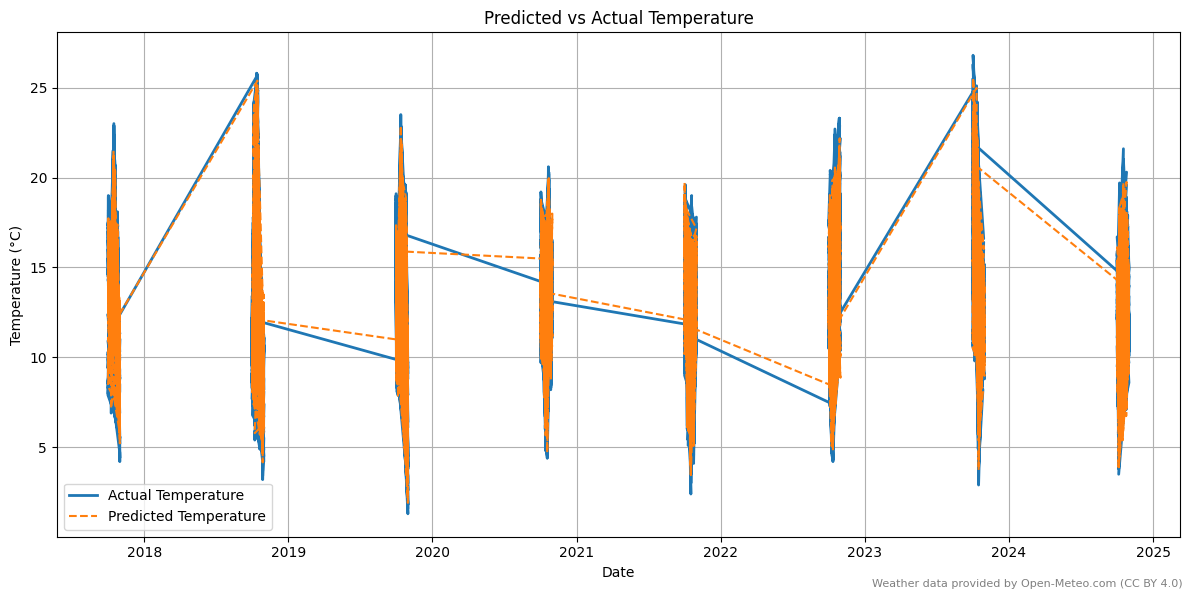

Current weather input:


,value
date,2025-10-27
temp,10.6
rel_humidity,79
pressure,992.2
wind_speed,24.5
wind_direction,264
precip,0.0


Predicted temperature: 11.52 °C


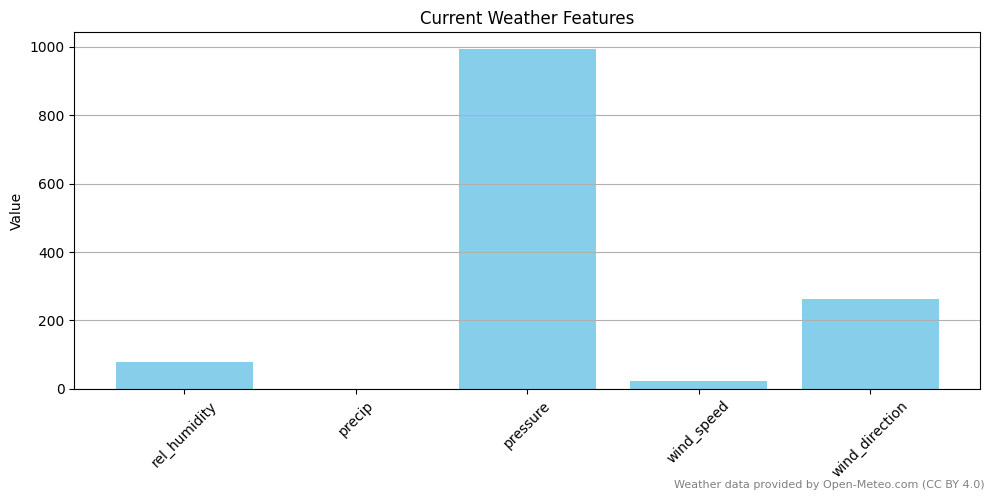

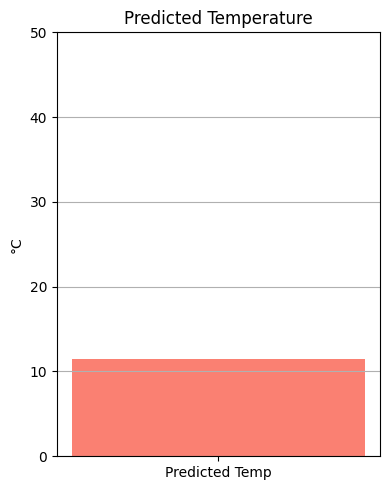

>>> Machine Learning prediction and visualization end
>>> Loading prediction to BigQuery
Table elt-siegburg-weather-forecast.elt_weather_dataset_prediction_siegburg_october_2025.elt_weather_prediction_table_20251027_1133 exists but is empty. Loading data...
Loaded 1 rows to elt-siegburg-weather-forecast.elt_weather_dataset_prediction_siegburg_october_2025.elt_weather_prediction_table_20251027_1133
>>> Loading ends
>>> main() is done.


In [5]:
# Import librariesand call main() directly
import sys
import importlib
import main
main_project_dir = "/content/drive/MyDrive/elt_pipeline_weather_forecast/weather_pipeline"


# Add gcp_utils to the front of the search path to give it priority
if main_project_dir not in sys.path:
    sys.path.insert(0, main_project_dir)

importlib.reload(main)
print(main.__file__)

main.main(project_id, dataset_historical, table_historical, dataset_month, table_id_8h_current, table_id_8h_prediction_current, dataset_prediction)

# Future Dockerize the Project

For future dockerization base Dockerfile (comment out):

In [6]:
# dockerfile_code = """
# FROM python:3.10-slim

# WORKDIR /app

# COPY . .

# RUN pip install --no-cache-dir -r requirements.txt

# CMD ["python", "main.py"]
# """

# with open(f"{project_dir}/Dockerfile", "w") as f:
#     f.write(dockerfile_code)
